In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [13]:
path='ex2data1.txt'
data=pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
pos = data[data['Admitted'] == 1]
neg = data[data['Admitted'] == 0]

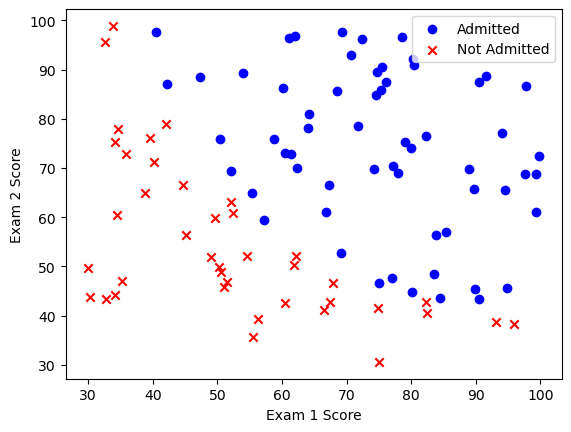

In [20]:
plt.scatter(pos['Exam1'], pos['Exam2'], c='b',marker='o', label='Admitted')
plt.scatter(neg['Exam1'], neg['Exam2'], c='r',marker='x', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc=1)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
X=data.iloc[:,0:2]
y=data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf=LogisticRegression(random_state=42).fit(X_train, y_train)
print('train_acc:%.2f%%'%(clf.score(X_train,y_train)*100))
print('test_acc:%.2f%%'%(clf.score(X_test,y_test)*100))

train_acc:91.25%
test_acc:80.00%


In [27]:
def plt_boun_one(model ,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-2,axis[1]+2,int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2]-2,axis[3]+2,int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(X_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom = ListedColormap(['#EF9A9A', '#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom)
    

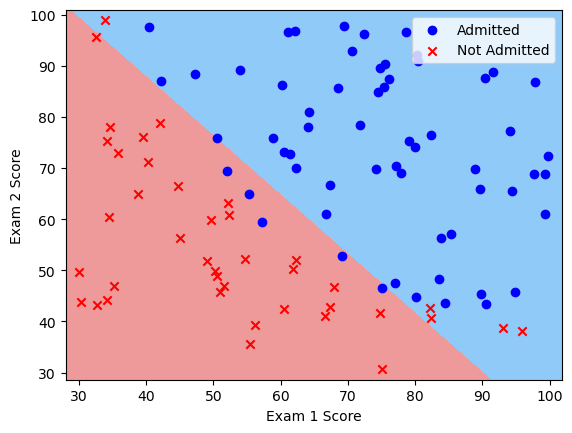

In [28]:
min1,max1=data['Exam1'].agg(['min','max'])
min2,max2=data['Exam2'].agg(['min','max'])

plt_boun_one(clf,[min1,max1,min2,max2])
plt.scatter(pos['Exam1'], pos['Exam2'], c='b',marker='o', label='Admitted')
plt.scatter(neg['Exam1'], neg['Exam2'], c='r',marker='x', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc=1)
plt.show()